### IST.707.M001.SPRING22.Applied Machine Learning - FINAL PROJECT
### Submitted by: Kirat Saran, Pranali Shenvi
# Heart Disease Prediction

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# Importing two libraries numpy and pandas
# Using numpy for using objects for multi-dimensional arrays
# Using pandas for using structures and data analysis tools
# Using matplotlib.pyplot for visualizations

#MainFile = pd.read_csv('/Users/pranalishenvi/Desktop/heart_2020_cleaned.csv')
MainFile = pd.read_csv('heart_2020_cleaned.csv')

# Loading the csv file in Python as MainFile as a pandas dataframe

In [2]:
MainFile.head()

# Using the head function to explore the first five rows of the dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
MainFile.isnull().sum(axis = 0)

# Using the isnull function to check for null values
# We can see that there are no null values in any of the columns in the dataset MainFile

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
MainFile.info()

# Using the info function we can check the data type of each column and we can also see the count of non - null 
# values
# In the dataset MainFile we can see that there are 319795 non - null values in each column which means that there are
# no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
duplicateRowsDF = MainFile[MainFile.duplicated()]
duplicateRowsDF

# We have used the duplicated function to check for any duplicate row values
# Here, there are 18078 duplicate row values present
# We are keeping these rows as we are assuming that there can be multiple individuals with same statistical values
# of habits and health conditions

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [6]:
MainFile["HeartDisease"].value_counts()

# Using the value_counts function to find out the number of individuals having heart disease

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

We can also infer that our datasetin imbalanced. Accuracy score as a metric would be misleading for our imbalanced dataset. Classifier will predict the most common class (No HeartDisease) without performing any analysis of the features and therefore will interpret an incorrect high accuracy rate.

<AxesSubplot:ylabel='HeartDisease'>

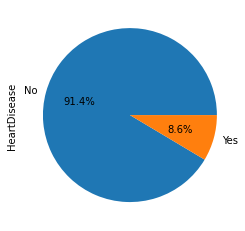

In [7]:
MainFile["HeartDisease"].value_counts().plot(kind = 'pie', autopct='%1.1f%%')

# Plotting the pie chart for number of individuals having heart disease
# We can see that only 8.6 percent of the individuals have heart disease
# Our aim is to find the factors to reduce the percentage of individuals having heart disease

Categorical and Numerical Variables

In [8]:
df=pd.DataFrame(MainFile)

# Creating a dataframe df of the dataset MainFile

In [9]:
numerical_ft = df._get_numeric_data().columns.tolist()
categorical_ft = df.select_dtypes(include=['object']).columns.tolist()

In [10]:
numerical_ft

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [11]:
categorical_ft

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

Imbalance visualisations
1. Histograms for categorical features.
2. Kernel Density Estimate (KDE) plots for numerical features.

In [12]:
def bar_plot(df):
    for feature in df[categorical_ft].iloc[:, 1:]:
        figure, axis = plt.subplots(1, 1, figsize=(10, 8))
        sns.histplot(data=df, x=feature, hue="HeartDisease", multiple="dodge", shrink=.7)
        plt.title(f'{feature} with Heart Disease')
        plt.show()

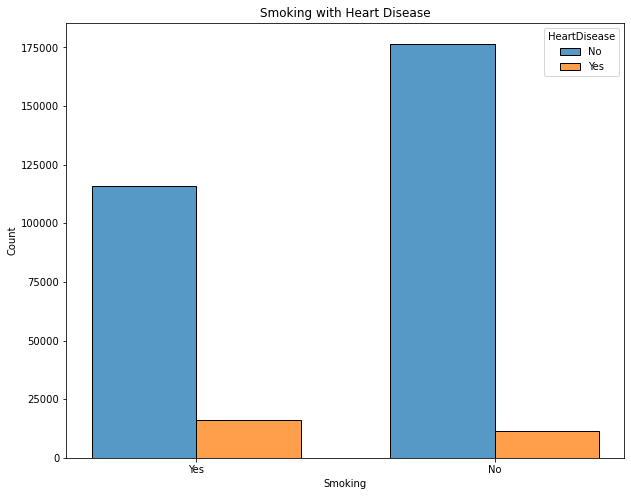

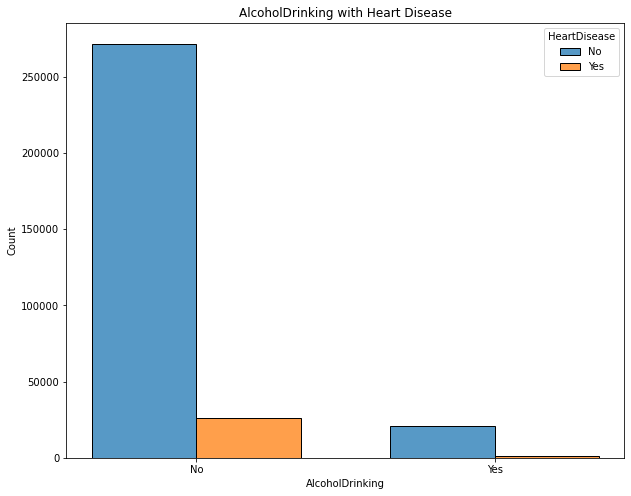

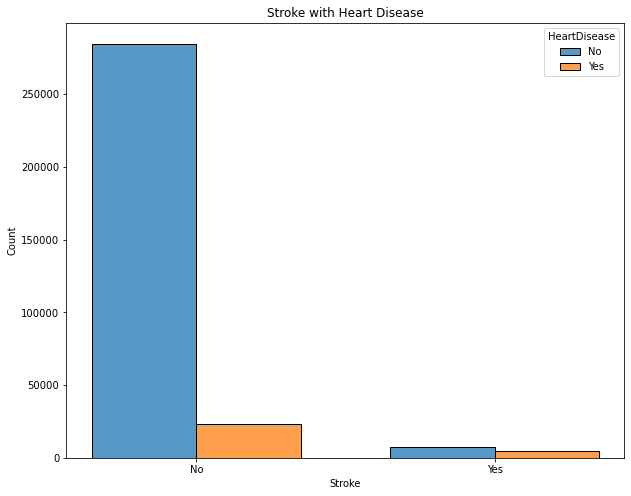

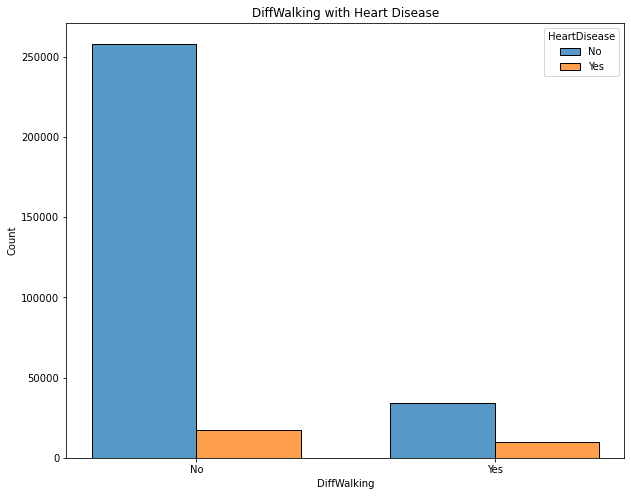

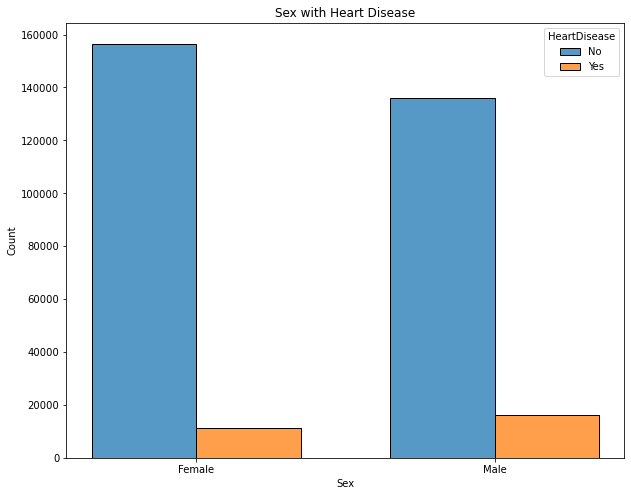

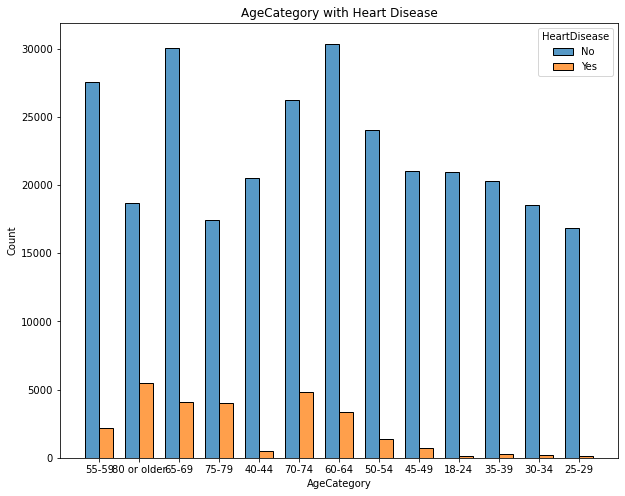

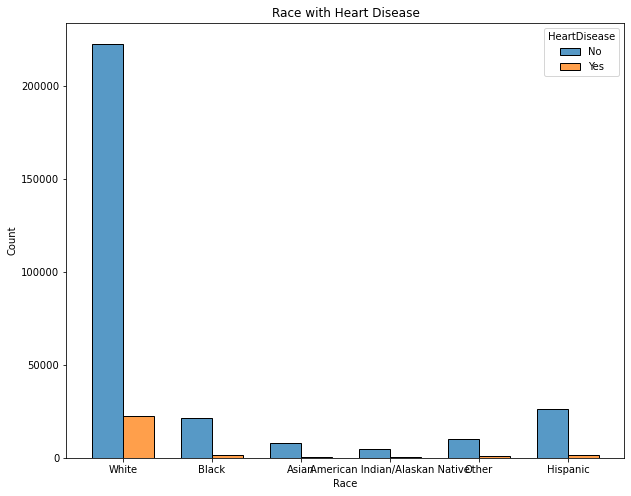

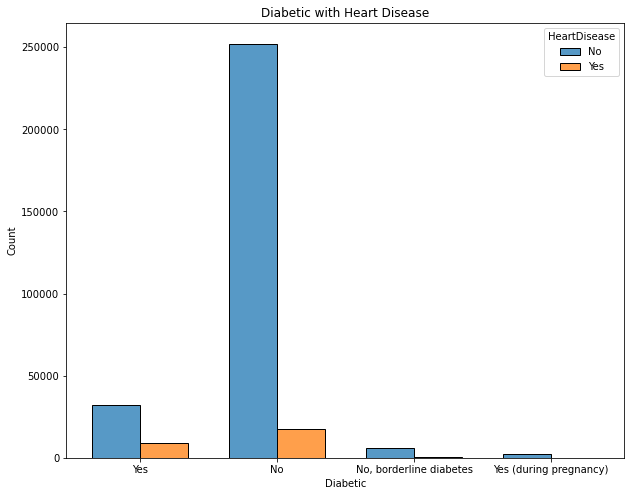

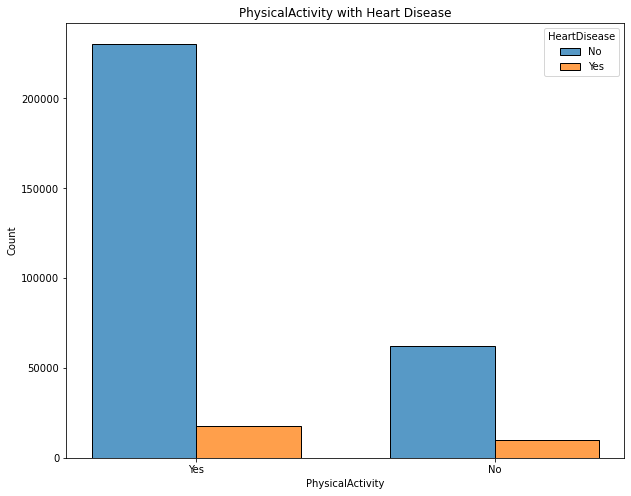

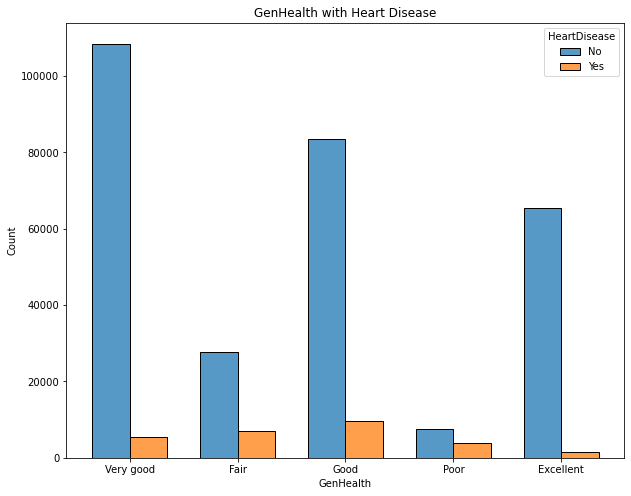

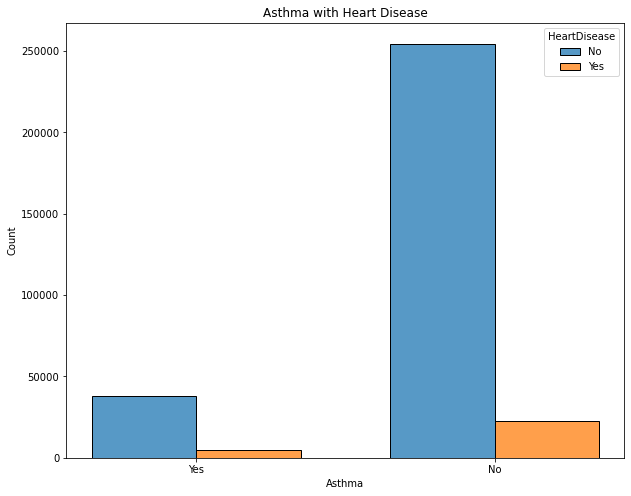

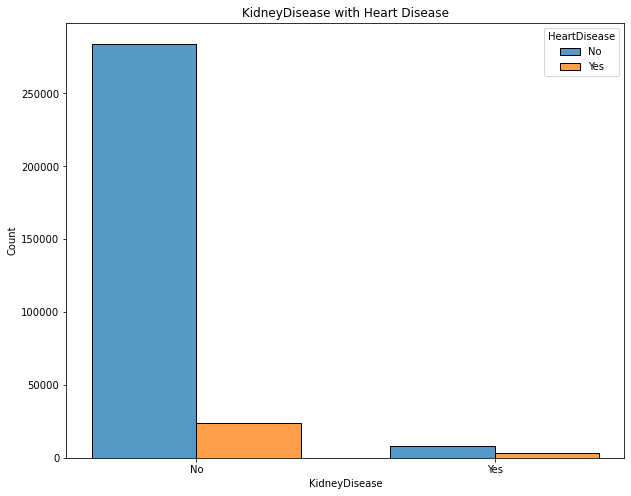

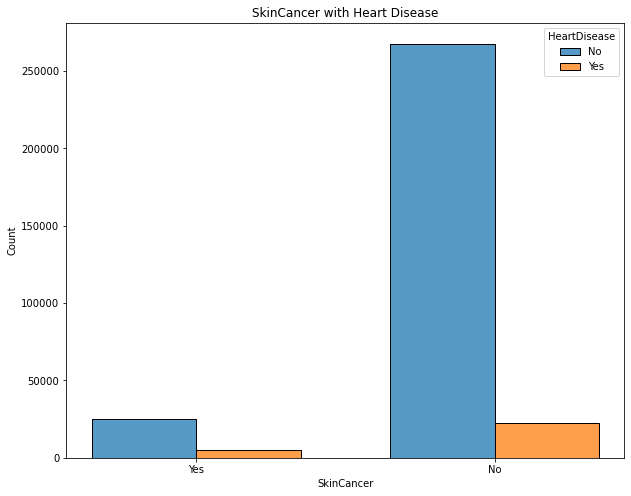

In [13]:
bar_plot(df)

In [14]:
def kde_plot(df):
    for feature in df[numerical_ft].iloc[:, :]:
        figure, axis = plt.subplots(1, 1, figsize=(10, 8))
        sns.kdeplot(df.loc[(df['HeartDisease']=='Yes'), feature], color='red', shade=True, label='Yes')
        sns.kdeplot(df.loc[(df['HeartDisease']=='No'), feature], color='green', shade= True, label='No')
        plt.title(f'{feature} with Heart Disease')
        plt.legend(title='Heart Disease')
        plt.show()

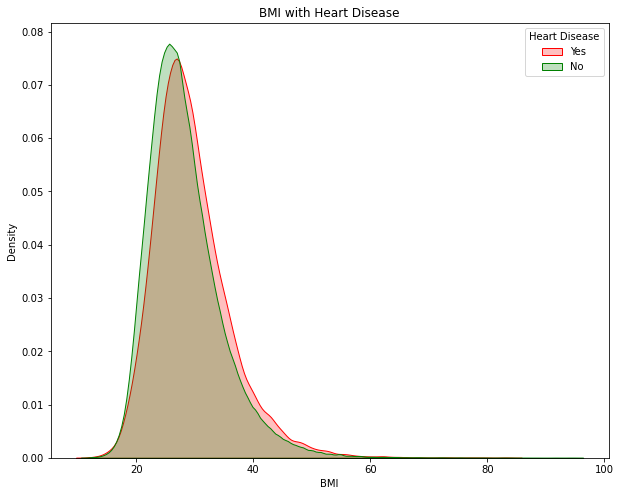

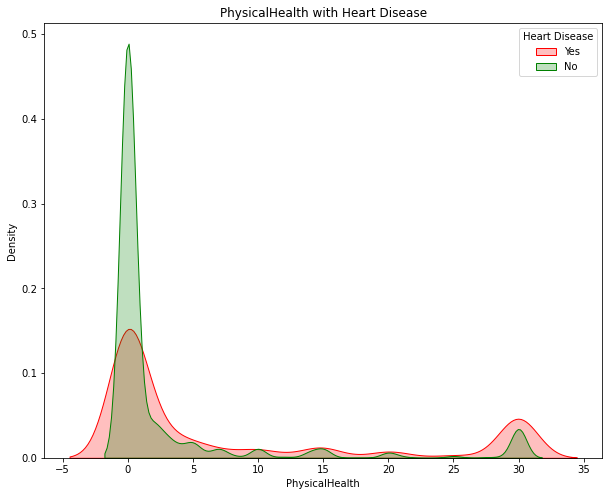

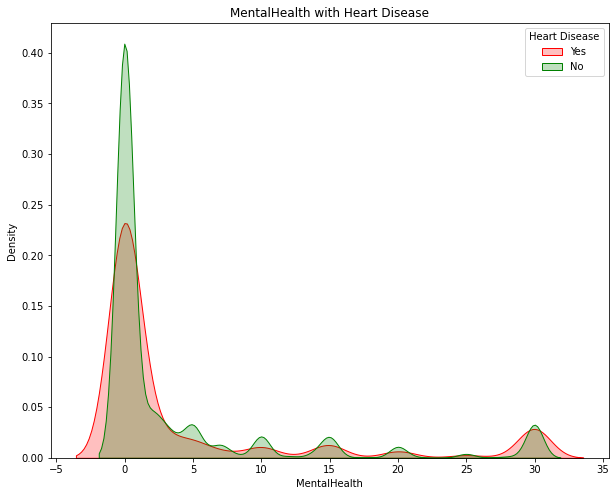

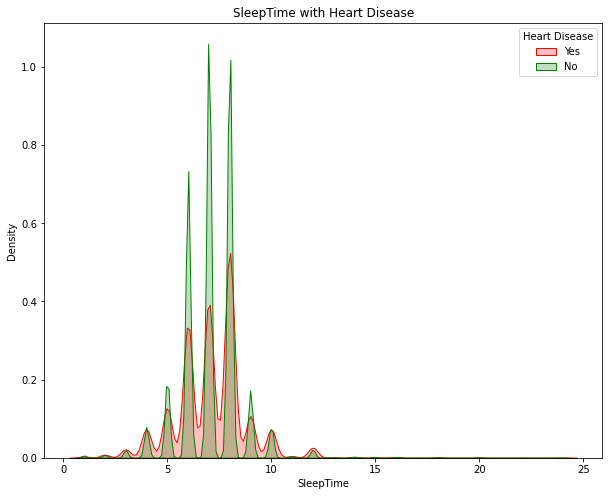

In [15]:
kde_plot(df)

In [16]:
Pivot=pd.pivot_table(MainFile, index=['AgeCategory'], columns=['Sex'], values=['HeartDisease'], aggfunc='count')
Pivot

HeartDisease       
Sex               Female   Male
AgeCategory                    
18-24               9434  11630
25-29               7956   8999
30-34               9130   9623
35-39              10458  10092
40-44              10952  10054
45-49              11438  10353
50-54              13335  12047
55-59              15487  14270
60-64              17572  16114
65-69              18048  16103
70-74              17089  13976
75-79              12190   9292
80 or older        14716   9437

Text(0, 0.5, 'Disease count')

<Figure size 432x288 with 0 Axes>

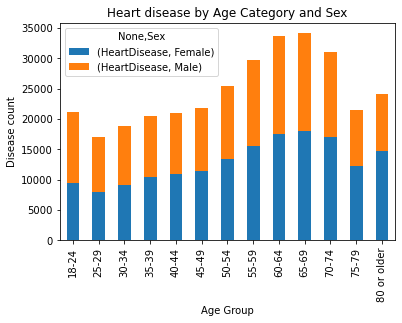

In [17]:
plt.figure()
Pivot.plot.bar(title='Heart disease by Age Category and Sex', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Disease count') 

In [18]:
dfyes = df.query('HeartDisease == "Yes"')
dfno = df.query('HeartDisease == "No"')

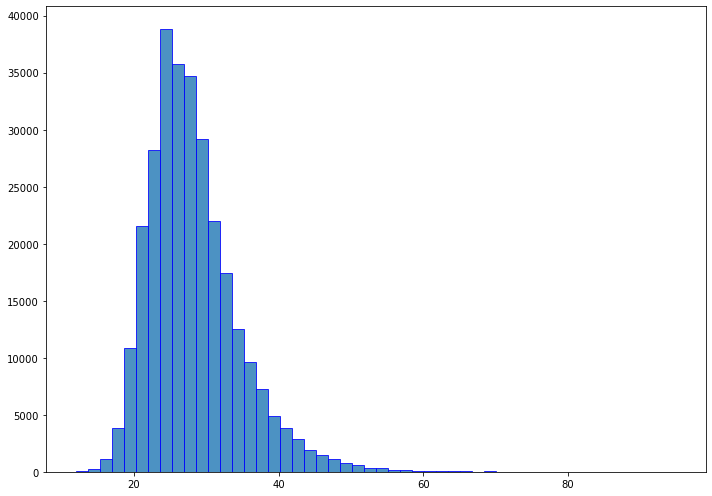

In [19]:
#MainFile["BMI"]
#plt.show()

# Creating histogram
fig, axs = plt.subplots(1, 1,
                    figsize =(10, 7),
                    tight_layout = True)

plt.hist(dfno["BMI"], label = "No Heart Disease", alpha=.8, bins = 50, edgecolor = "blue")

# Show plot
plt.show()

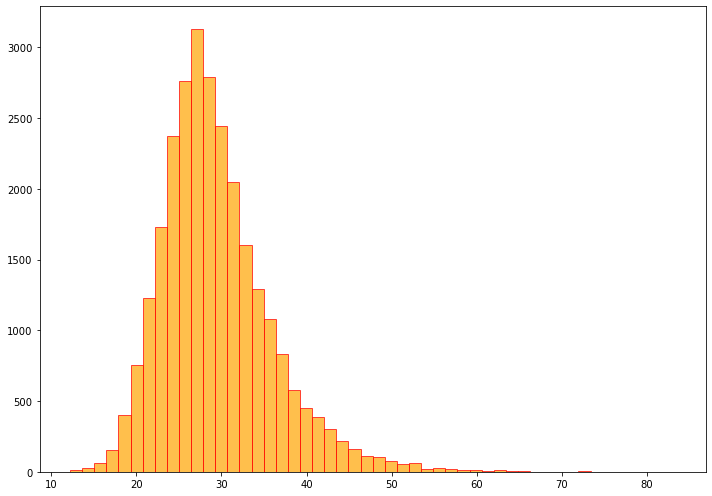

In [20]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                    figsize =(10, 7),
                    tight_layout = True)

plt.hist(dfyes["BMI"], label = "Heart Disease", alpha=.7, bins = 50, color = "orange", edgecolor = "red")

# Show plot
plt.show()

In [21]:
Pivot1=pd.pivot_table(MainFile, index=['Race'], columns=['HeartDisease'], values=['Sex'], aggfunc='count')
Pivot1

Sex       
HeartDisease                        No    Yes
Race                                         
American Indian/Alaskan Native    4660    542
Asian                             7802    266
Black                            21210   1729
Hispanic                         26003   1443
Other                            10042    886
White                           222705  22507

##### Label encoding

In [22]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
df['HeartDisease']= label_encoder.fit_transform(df['HeartDisease'])
df['Smoking']= label_encoder.fit_transform(df['Smoking'])
df['AlcoholDrinking']= label_encoder.fit_transform(df['AlcoholDrinking'])
df['Stroke']= label_encoder.fit_transform(df['Stroke'])
df['DiffWalking']= label_encoder.fit_transform(df['DiffWalking'])
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['AgeCategory']= label_encoder.fit_transform(df['AgeCategory'])
df['Race']= label_encoder.fit_transform(df['Race'])
df['Diabetic']= label_encoder.fit_transform(df['Diabetic'])
df['PhysicalActivity']= label_encoder.fit_transform(df['PhysicalActivity'])
df['GenHealth']= label_encoder.fit_transform(df['GenHealth'])
df['Asthma']= label_encoder.fit_transform(df['Asthma'])
df['KidneyDisease']= label_encoder.fit_transform(df['KidneyDisease'])
df['SkinCancer']= label_encoder.fit_transform(df['SkinCancer'])


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [24]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


##### Split dataset for training and testing

In [25]:
#Selecting features
features = df.drop('HeartDisease', axis = 1)

In [26]:
#Target variable
target = df['HeartDisease']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 44, stratify= target)
#splitting the data into train and test with train size of 70% and test size 
#of 30% and stratify=target to balance the classes in both train and test

In [28]:
X_train.shape

(223856, 17)

In [29]:
y_train.value_counts()

0    204695
1     19161
Name: HeartDisease, dtype: int64

In [30]:
X_test.shape

(95939, 17)

In [31]:
y_test.value_counts()

0    87727
1     8212
Name: HeartDisease, dtype: int64

In [32]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (223856, 17)
Shape of testing feature: (95939, 17)
Shape of training label: (223856,)
Shape of training label: (95939,)


##### Creating a function for predection and evaluation of models

In [33]:
from sklearn import metrics

def evaluate_model(model, x_test, y_test):
    #Predict test data
    y_pred= model.predict(x_test)
    
    # Calculate accuracy, precision, recall, f1-score and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    
    # Calculate area under curve (AUC)
    y_pred_prob = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
    auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'fpr': fpr, 'tpr': tpr, 'auc': auc}

##### Sampling Techniques to deal with Imbalanced Dataset

Undersampling

In [34]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

under_sampler = RandomUnderSampler(sampling_strategy=0.5)
x = df.iloc[:, 1:]
y = df['HeartDisease']
x_under, y_under = under_sampler.fit_resample(x, y)

print('Before undersampling:', Counter(df["HeartDisease"]))
print('After undersampling:', Counter(y_under))

Before undersampling: Counter({0: 292422, 1: 27373})
After undersampling: Counter({0: 54746, 1: 27373})


<AxesSubplot:title={'center':'Undersampling HeartDisease Results'}>

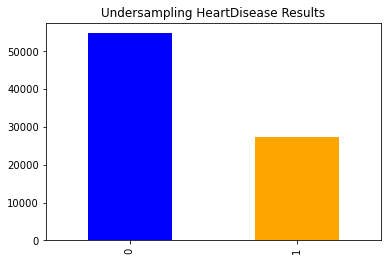

In [35]:
y_under.value_counts().plot(kind='bar', title='Undersampling HeartDisease Results', color= ['blue','orange'])

Oversampling

In [36]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

over_sampler = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = over_sampler.fit_resample(x, y)

print('Before oversampling: ', Counter(df["HeartDisease"]))
print('After oversampling: ', Counter(y_over))

Before oversampling:  Counter({0: 292422, 1: 27373})
After oversampling:  Counter({0: 292422, 1: 292422})


<AxesSubplot:title={'center':'Oversampling HeartDisease Results'}>

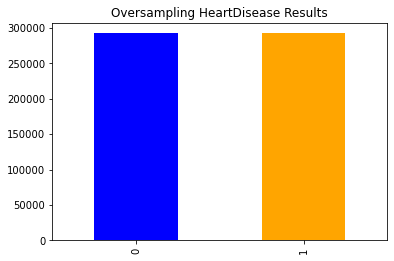

In [37]:
y_over.value_counts().plot(kind='bar', title='Oversampling HeartDisease Results', color= ['blue','orange'])

SMOTE Oversampling

In [38]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x_smote,y_smote = smt.fit_resample(x,y)

print('Before smote sampling:', Counter(df["HeartDisease"]))
print('After smote sampling:', Counter(y_smote))

Before smote sampling: Counter({0: 292422, 1: 27373})
After smote sampling: Counter({0: 292422, 1: 292422})


<AxesSubplot:title={'center':'SMOTE Sampling HeartDisease Results'}>

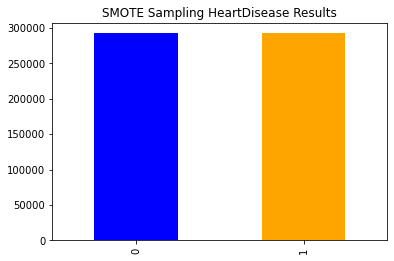

In [39]:
y_smote.value_counts().plot(kind='bar', title='SMOTE Sampling HeartDisease Results', color= ['blue','orange'])

##### Building model using k-nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Predicting and evaluating k-nearest neighbors model for original imbalanced dataset

In [39]:
knn_evaluate = evaluate_model(knn, X_test, y_test)
print('Accuracy:', knn_evaluate['acc'])
print('Precision:', knn_evaluate['prec'])
print('Recall:', knn_evaluate['rec'])
print('F1 Score:', knn_evaluate['f1'])
print('Cohens Kappa Score:', knn_evaluate['kappa'])
print('Area Under Curve:', knn_evaluate['auc'])

Accuracy: 0.9068887522279782
Precision: 0.33410032213529683
Recall: 0.0884072089624939
F1 Score: 0.13981704381319213
Cohens Kappa Score: 0.10785974142039312
Area Under Curve: 0.6889303887384639


Predicting and evaluating k-nearest neighbors model for undersampled dataset

In [40]:
#knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_under, y_under)

knn_evaluate = evaluate_model(knn, X_test, y_test)
print('Accuracy:', knn_evaluate['acc'])
print('Precision:', knn_evaluate['prec'])
print('Recall:', knn_evaluate['rec'])
print('F1 Score:', knn_evaluate['f1'])
print('Cohens Kappa Score:', knn_evaluate['kappa'])
print('Area Under Curve:', knn_evaluate['auc'])

Accuracy: 0.8261603727368432
Precision: 0.28151130380922884
Recall: 0.664150024354603
F1 Score: 0.39541796563474224
Cohens Kappa Score: 0.3127950337553017
Area Under Curve: 0.8564702806964957


Predicting and evaluating k-nearest neighbors model for oversampled dataset

In [41]:
#knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_over, y_over)

knn_evaluate = evaluate_model(knn, X_test, y_test)
print('Accuracy:', knn_evaluate['acc'])
print('Precision:', knn_evaluate['prec'])
print('Recall:', knn_evaluate['rec'])
print('F1 Score:', knn_evaluate['f1'])
print('Cohens Kappa Score:', knn_evaluate['kappa'])
print('Area Under Curve:', knn_evaluate['auc'])

Accuracy: 0.8855001615609919
Precision: 0.4276923076923077
Recall: 0.9986604968339016
F1 Score: 0.5988972870339943
Cohens Kappa Score: 0.5442739091830344
Area Under Curve: 0.9973332296855413


Predicting and evaluating k-nearest neighbors model for SMOTE oversampled dataset

In [51]:
#knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_smote, y_smote)

knn_evaluate = evaluate_model(knn, X_test, y_test)
print('Accuracy:', knn_evaluate['acc'])
print('Precision:', knn_evaluate['prec'])
print('Recall:', knn_evaluate['rec'])
print('F1 Score:', knn_evaluate['f1'])
print('Cohens Kappa Score:', knn_evaluate['kappa'])
print('Area Under Curve:', knn_evaluate['auc'])

Accuracy: 0.8342696922002523
Precision: 0.3374355070625053
Recall: 0.9716268874817341
F1 Score: 0.5009102894092535
Cohens Kappa Score: 0.4282630363824448
Area Under Curve: 0.9811530638452614


##### Building model using Decision Tree Model

In [40]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Predicting and evaluating Decision Tree Classifier for original imbalanced dataset

In [41]:
clf_evaluate = evaluate_model(clf, X_test, y_test)
print('Accuracy:', clf_evaluate['acc'])
print('Precision:', clf_evaluate['prec'])
print('Recall:', clf_evaluate['rec'])
print('F1 Score:', clf_evaluate['f1'])
print('Cohens Kappa Score:', clf_evaluate['kappa'])
print('Area Under Curve:', clf_evaluate['auc'])

Accuracy: 0.86325686113051
Precision: 0.2296418732782369
Recall: 0.25377496346809547
F1 Score: 0.24110603343552958
Cohens Kappa Score: 0.16617046143584202
Area Under Curve: 0.5887118344448228


Predicting and evaluating Decision Tree Classifier for undersampled dataset

In [42]:
#clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_under, y_under)

clf_evaluate = evaluate_model(clf, X_test, y_test)
print('Accuracy:', clf_evaluate['acc'])
print('Precision:', clf_evaluate['prec'])
print('Recall:', clf_evaluate['rec'])
print('F1 Score:', clf_evaluate['f1'])
print('Cohens Kappa Score:', clf_evaluate['kappa'])
print('Area Under Curve:', clf_evaluate['auc'])

Accuracy: 0.825482858899926
Precision: 0.32791382579578005
Recall: 0.9897710667316123
F1 Score: 0.49262098851480346
Cohens Kappa Score: 0.4177494328777813
Area Under Curve: 0.904242899046771


Predicting and evaluating Decision Tree Classifier for oversampled dataset

In [43]:
#clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_over, y_over)

clf_evaluate = evaluate_model(clf, X_test, y_test)
print('Accuracy:', clf_evaluate['acc'])
print('Precision:', clf_evaluate['prec'])
print('Recall:', clf_evaluate['rec'])
print('F1 Score:', clf_evaluate['f1'])
print('Cohens Kappa Score:', clf_evaluate['kappa'])
print('Area Under Curve:', clf_evaluate['auc'])

Accuracy: 0.9938711055983489
Precision: 0.9333788085493406
Recall: 0.9997564539698003
F1 Score: 0.9654280338664158
Cohens Kappa Score: 0.9620698855304475
Area Under Curve: 0.9999021875090278


Predicting and evaluating Decision Tree Classifier for SMOTE oversampled dataset

In [44]:
#clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_smote, y_smote)

clf_evaluate = evaluate_model(clf, X_test, y_test)
print('Accuracy:', clf_evaluate['acc'])
print('Precision:', clf_evaluate['prec'])
print('Recall:', clf_evaluate['rec'])
print('F1 Score:', clf_evaluate['f1'])
print('Cohens Kappa Score:', clf_evaluate['kappa'])
print('Area Under Curve:', clf_evaluate['auc'])

Accuracy: 0.9960495731662827
Precision: 0.9857373186158997
Recall: 0.9678519240136386
F1 Score: 0.9767127496159755
Cohens Kappa Score: 0.9745546698018548
Area Under Curve: 0.9998892262140047


##### Building model using Naive Bayes Classifier

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Predicting and evaluating Naive Bayes Classifier for original imbalanced dataset

In [48]:
gnb_evaluate = evaluate_model(gnb, X_test, y_test)
print('Accuracy:', gnb_evaluate['acc'])
print('Precision:', gnb_evaluate['prec'])
print('Recall:', gnb_evaluate['rec'])
print('F1 Score:', gnb_evaluate['f1'])
print('Cohens Kappa Score:', gnb_evaluate['kappa'])
print('Area Under Curve:', gnb_evaluate['auc'])

Accuracy: 0.8476323497222193
Precision: 0.2722230123737733
Recall: 0.4661471018022406
F1 Score: 0.34371913441680885
Cohens Kappa Score: 0.26419573677335906
Area Under Curve: 0.8035145761523133


Predicting and evaluating Naive Bayes Classifier for undersampled dataset

In [49]:
#gnb = GaussianNB()
gnb.fit(x_under, y_under)

gnb_evaluate = evaluate_model(gnb, X_test, y_test)
print('Accuracy:', gnb_evaluate['acc'])
print('Precision:', gnb_evaluate['prec'])
print('Recall:', gnb_evaluate['rec'])
print('F1 Score:', gnb_evaluate['f1'])
print('Cohens Kappa Score:', gnb_evaluate['kappa'])
print('Area Under Curve:', gnb_evaluate['auc'])

Accuracy: 0.8186868739511565
Precision: 0.2472615181372819
Recall: 0.5470043838285436
F1 Score: 0.3405739413927746
Cohens Kappa Score: 0.25243735422508207
Area Under Curve: 0.8035620696686951


Predicting and evaluating Naive Bayes Classifier for oversampled dataset

In [50]:
#gnb = GaussianNB()
gnb.fit(x_over, y_over)

gnb_evaluate = evaluate_model(gnb, X_test, y_test)
print('Accuracy:', gnb_evaluate['acc'])
print('Precision:', gnb_evaluate['prec'])
print('Recall:', gnb_evaluate['rec'])
print('F1 Score:', gnb_evaluate['f1'])
print('Cohens Kappa Score:', gnb_evaluate['kappa'])
print('Area Under Curve:', gnb_evaluate['auc'])

Accuracy: 0.7967771187942339
Precision: 0.23284882344585958
Recall: 0.5988796882610814
F1 Score: 0.335321992295367
Cohens Kappa Score: 0.24187077034957627
Area Under Curve: 0.8033083628160516


Predicting and evaluating Naive Bayes Classifier for SMOTE oversampled dataset

In [43]:
#gnb = GaussianNB()
gnb.fit(x_smote, y_smote)

gnb_evaluate = evaluate_model(gnb, X_test, y_test)
print('Accuracy:', gnb_evaluate['acc'])
print('Precision:', gnb_evaluate['prec'])
print('Recall:', gnb_evaluate['rec'])
print('F1 Score:', gnb_evaluate['f1'])
print('Cohens Kappa Score:', gnb_evaluate['kappa'])
print('Area Under Curve:', gnb_evaluate['auc'])

Accuracy: 0.7157360406091371
Precision: 0.1901820546163849
Recall: 0.7123721383341451
F1 Score: 0.30021553936159295
Cohens Kappa Score: 0.1908890318257459
Area Under Curve: 0.7749917518274531


##### Building model using Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=0, max_iter=1000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

Predicting and evaluating Logistic Regression Classifier for original imbalanced dataset

In [58]:
log_evaluate = evaluate_model(log, X_test, y_test)
print('Accuracy:', log_evaluate['acc'])
print('Precision:', log_evaluate['prec'])
print('Recall:', log_evaluate['rec'])
print('F1 Score:', log_evaluate['f1'])
print('Cohens Kappa Score:', log_evaluate['kappa'])
print('Area Under Curve:', log_evaluate['auc'])

Accuracy: 0.9146124099688344
Precision: 0.5065616797900262
Recall: 0.09400876765708718
F1 Score: 0.15858668857847164
Cohens Kappa Score: 0.135418389836798
Area Under Curve: 0.8293478446571932


Predicting and evaluating Logistic Regression Classifier for undersampled dataset

In [59]:
#log = LogisticRegression(random_state=0, max_iter=1000)
log.fit(x_under, y_under)

log_evaluate = evaluate_model(log, X_test, y_test)
print('Accuracy:', log_evaluate['acc'])
print('Precision:', log_evaluate['prec'])
print('Recall:', log_evaluate['rec'])
print('F1 Score:', log_evaluate['f1'])
print('Cohens Kappa Score:', log_evaluate['kappa'])
print('Area Under Curve:', log_evaluate['auc'])

Accuracy: 0.8472049948404715
Precision: 0.2911835201140118
Recall: 0.5473697028738431
F1 Score: 0.3801429235908495
Cohens Kappa Score: 0.30216197734660866
Area Under Curve: 0.8295287558798612


Predicting and evaluating Logistic Regression Classifier for oversampled dataset

In [60]:
#log = LogisticRegression(random_state=0, max_iter=1000)
log.fit(x_over, y_over)

log_evaluate = evaluate_model(log, X_test, y_test)
print('Accuracy:', log_evaluate['acc'])
print('Precision:', log_evaluate['prec'])
print('Recall:', log_evaluate['rec'])
print('F1 Score:', log_evaluate['f1'])
print('Cohens Kappa Score:', log_evaluate['kappa'])
print('Area Under Curve:', log_evaluate['auc'])

Accuracy: 0.7413981800936011
Precision: 0.2159044228399288
Recall: 0.7680224062347784
F1 Score: 0.33705643437366395
Cohens Kappa Score: 0.23480566550651905
Area Under Curve: 0.8297664594371555


Predicting and evaluating Logistic Regression Classifier for SMOTE oversampled dataset

In [45]:
#log = LogisticRegression(random_state=0, max_iter=1000)
log.fit(x_smote, y_smote)

log_evaluate = evaluate_model(log, X_test, y_test)
print('Accuracy:', log_evaluate['acc'])
print('Precision:', log_evaluate['prec'])
print('Recall:', log_evaluate['rec'])
print('F1 Score:', log_evaluate['f1'])
print('Cohens Kappa Score:', log_evaluate['kappa'])
print('Area Under Curve:', log_evaluate['auc'])

Accuracy: 0.7036033312834197
Precision: 0.18409871915026554
Recall: 0.7176083779834389
F1 Score: 0.2930237183630849
Cohens Kappa Score: 0.1815127224204025
Area Under Curve: 0.7724960553383043


##### Building model using Linear Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

Predicting and evaluating Linear Support Vector Classifier for original imbalanced dataset

In [71]:
# svc_evaluate = evaluate_model(svc, X_test, y_test)
# print('Accuracy:', svc_evaluate['acc'])
# print('Precision:', svc_evaluate['prec'])
# print('Recall:', svc_evaluate['rec'])
# print('F1 Score:', svc_evaluate['f1'])
# print('Cohens Kappa Score:', svc_evaluate['kappa'])
# print('Area Under Curve:', svc_evaluate['auc'])

NameError: name 'svc' is not defined

Predicting and evaluating Linear Support Vector Classifier for undersampled dataset

In [ ]:
# #svc = SVC(kernel='rbf')
# svc.fit(x_under, y_under)

# svc_evaluate = evaluate_model(svc, X_test, y_test)
# print('Accuracy:', svc_evaluate['acc'])
# print('Precision:', svc_evaluate['prec'])
# print('Recall:', svc_evaluate['rec'])
# print('F1 Score:', svc_evaluate['f1'])
# print('Cohens Kappa Score:', svc_evaluate['kappa'])
# print('Area Under Curve:', svc_evaluate['auc'])

Predicting and evaluating Linear Support Vector Classifier for oversampled dataset

In [ ]:
# #svc = SVC(kernel='rbf')
# svc.fit(x_over, y_over)

# svc_evaluate = evaluate_model(svc, X_test, y_test)
# print('Accuracy:', svc_evaluate['acc'])
# print('Precision:', svc_evaluate['prec'])
# print('Recall:', svc_evaluate['rec'])
# print('F1 Score:', svc_evaluate['f1'])
# print('Cohens Kappa Score:', svc_evaluate['kappa'])
# print('Area Under Curve:', svc_evaluate['auc'])

Predicting and evaluating Linear Support Vector Classifier for SMOTE oversampled dataset

In [ ]:
# #svc = SVC(kernel='rbf')
# svc.fit(x_smote, y_smote)

# svc_evaluate = evaluate_model(svc, X_test, y_test)
# print('Accuracy:', svc_evaluate['acc'])
# print('Precision:', svc_evaluate['prec'])
# print('Recall:', svc_evaluate['rec'])
# print('F1 Score:', svc_evaluate['f1'])
# print('Cohens Kappa Score:', svc_evaluate['kappa'])
# print('Area Under Curve:', svc_evaluate['auc'])

##### Building model using Random Forest  -- Bagging Technique

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

Predicting and evaluating Random Forest Classifier for original imbalanced dataset

In [41]:
rf_clf_evaluate = evaluate_model(rf_clf, X_test, y_test)
print('Accuracy:', rf_clf_evaluate['acc'])
print('Precision:', rf_clf_evaluate['prec'])
print('Recall:', rf_clf_evaluate['rec'])
print('F1 Score:', rf_clf_evaluate['f1'])
print('Cohens Kappa Score:', rf_clf_evaluate['kappa'])
print('Area Under Curve:', rf_clf_evaluate['auc'])

Accuracy: 0.9066802864320037
Precision: 0.35600466381655654
Recall: 0.11154408183146615
F1 Score: 0.16986555401019934
Cohens Kappa Score: 0.13451782527922962
Area Under Curve: 0.7968831292652445


Predicting and evaluating Random Forest Classifier for undersampled dataset

In [42]:
#rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_under, y_under)

rf_clf_evaluate = evaluate_model(rf_clf, X_test, y_test)
print('Accuracy:', rf_clf_evaluate['acc'])
print('Precision:', rf_clf_evaluate['prec'])
print('Recall:', rf_clf_evaluate['rec'])
print('F1 Score:', rf_clf_evaluate['f1'])
print('Cohens Kappa Score:', rf_clf_evaluate['kappa'])
print('Area Under Curve:', rf_clf_evaluate['auc'])

Accuracy: 0.8706157037284108
Precision: 0.397571560930414
Recall: 0.9928153921091086
F1 Score: 0.5677774295762387
Cohens Kappa Score: 0.507584057734124
Area Under Curve: 0.9760700950665981


Predicting and evaluating Random Forest Classifier for oversampled dataset

In [43]:
#rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_over, y_over)

rf_clf_evaluate = evaluate_model(rf_clf, X_test, y_test)
print('Accuracy:', rf_clf_evaluate['acc'])
print('Precision:', rf_clf_evaluate['prec'])
print('Recall:', rf_clf_evaluate['rec'])
print('F1 Score:', rf_clf_evaluate['f1'])
print('Cohens Kappa Score:', rf_clf_evaluate['kappa'])
print('Area Under Curve:', rf_clf_evaluate['auc'])

Accuracy: 0.9938606823085502
Precision: 0.933371233655486
Recall: 0.9996346809547004
F1 Score: 0.9653672017404599
Cohens Kappa Score: 0.9620033470834831
Area Under Curve: 0.9998999270036522


Predicting and evaluating Random Forest Classifier for SMOTE oversampled dataset

In [44]:
#rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_smote, y_smote)

rf_clf_evaluate = evaluate_model(rf_clf, X_test, y_test)
print('Accuracy:', rf_clf_evaluate['acc'])
print('Precision:', rf_clf_evaluate['prec'])
print('Recall:', rf_clf_evaluate['rec'])
print('F1 Score:', rf_clf_evaluate['f1'])
print('Cohens Kappa Score:', rf_clf_evaluate['kappa'])
print('Area Under Curve:', rf_clf_evaluate['auc'])

Accuracy: 0.9957681443417171
Precision: 0.9691105769230769
Recall: 0.9818558207501218
F1 Score: 0.9754415678683764
Cohens Kappa Score: 0.9731262539206588
Area Under Curve: 0.9992420179146849


##### Building model using XGBoost  -- Boosting Technique

In [48]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Predicting and evaluating XGBoost Classifier for original imbalanced dataset

In [68]:
xgb_clf_evaluate = evaluate_model(xgb_clf, X_test, y_test)
print('Accuracy:', xgb_clf_evaluate['acc'])
print('Precision:', xgb_clf_evaluate['prec'])
print('Recall:', xgb_clf_evaluate['rec'])
print('F1 Score:', xgb_clf_evaluate['f1'])
print('Cohens Kappa Score:', xgb_clf_evaluate['kappa'])
print('Area Under Curve:', xgb_clf_evaluate['auc'])

Accuracy: 0.9151752676179656
Precision: 0.5243421052631579
Recall: 0.09705309303458354
F1 Score: 0.1637895602137279
Cohens Kappa Score: 0.1408169177407118
Area Under Curve: 0.8417468846016127


Predicting and evaluating XGBoost Classifier for undersampled dataset

In [69]:
#xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_under, y_under)

xgb_clf_evaluate = evaluate_model(xgb_clf, X_test, y_test)
print('Accuracy:', xgb_clf_evaluate['acc'])
print('Precision:', xgb_clf_evaluate['prec'])
print('Recall:', xgb_clf_evaluate['rec'])
print('F1 Score:', xgb_clf_evaluate['f1'])
print('Cohens Kappa Score:', xgb_clf_evaluate['kappa'])
print('Area Under Curve:', xgb_clf_evaluate['auc'])

Accuracy: 0.8415243019001657
Precision: 0.3039699450487832
Recall: 0.6601315148563078
F1 Score: 0.41626353374798436
Cohens Kappa Score: 0.33875411957187895
Area Under Curve: 0.8638046246855648


Predicting and evaluating XGBoost Classifier for oversampled dataset

In [70]:
#xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_over, y_over)

xgb_clf_evaluate = evaluate_model(xgb_clf, X_test, y_test)
print('Accuracy:', xgb_clf_evaluate['acc'])
print('Precision:', xgb_clf_evaluate['prec'])
print('Recall:', xgb_clf_evaluate['rec'])
print('F1 Score:', xgb_clf_evaluate['f1'])
print('Cohens Kappa Score:', xgb_clf_evaluate['kappa'])
print('Area Under Curve:', xgb_clf_evaluate['auc'])

Accuracy: 0.752790835843609
Precision: 0.23483941580873552
Recall: 0.8360935216755967
F1 Score: 0.3666853587545729
Cohens Kappa Score: 0.26898332212043485
Area Under Curve: 0.8703531970175531


Predicting and evaluating XGBoost Classifier for SMOTE oversampled dataset

In [49]:
#xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_smote, y_smote)

xgb_clf_evaluate = evaluate_model(xgb_clf, X_test, y_test)
print('Accuracy:', xgb_clf_evaluate['acc'])
print('Precision:', xgb_clf_evaluate['prec'])
print('Recall:', xgb_clf_evaluate['rec'])
print('F1 Score:', xgb_clf_evaluate['f1'])
print('Cohens Kappa Score:', xgb_clf_evaluate['kappa'])
print('Area Under Curve:', xgb_clf_evaluate['auc'])

Accuracy: 0.8444636696234066
Precision: 0.2673047579414621
Recall: 0.4693132001948368
F1 Score: 0.34060980998674334
Cohens Kappa Score: 0.25988575294945016
Area Under Curve: 0.8079860140276761


Random Forest and Decison Tree algorithms give the best performance as per recall

##### Hyperparameter tuning on our best performing models - Random Forest and Decision Tree

##### Decision Tree

In [42]:
from sklearn.model_selection import GridSearchCV

In [44]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [47]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

For Original Imbalanced Data

In [60]:
grid_search.fit(X_train, y_train)    #for original imbalanced data.

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [61]:
score_rf_hp3 = pd.DataFrame(grid_search.cv_results_)
score_rf_hp3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.665669,0.014222,0.039832,0.005497,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.0,0.0,0.0,0.0,0.0,0.0,31
1,0.467083,0.005146,0.049807,0.010326,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.0,0.0,0.0,0.0,0.0,0.0,31
2,0.297396,0.013327,0.047693,0.009714,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.0,0.0,0.0,0.0,0.0,0.0,31
3,0.331369,0.003200,0.037743,0.002204,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.0,0.0,0.0,0.0,0.0,0.0,31
4,0.331609,0.011808,0.040037,0.006786,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.0,0.0,0.0,0.0,0.0,0.0,31


In [62]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=0)

In [63]:
print(grid_search.best_params_)

print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}
0.16867614294198977


In [64]:
grid_search_evaluate = evaluate_model(grid_search, X_test, y_test)
print('Accuracy:', grid_search_evaluate['acc'])
print('Precision:', grid_search_evaluate['prec'])
print('Recall:', grid_search_evaluate['rec'])
print('F1 Score:', grid_search_evaluate['f1'])
print('Cohens Kappa Score:', grid_search_evaluate['kappa'])
print('Area Under Curve:', grid_search_evaluate['auc'])

Accuracy: 0.8997279521362532
Precision: 0.3306063522617902
Recall: 0.16731612274719923
F1 Score: 0.2221862871927555
Cohens Kappa Score: 0.17471120097452864
Area Under Curve: 0.7067664577048186


For Undersampled Data

In [65]:
grid_search.fit(x_under, y_under)    #for undersampled data.

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [66]:
score_rf_hp4 = pd.DataFrame(grid_search.cv_results_)
score_rf_hp4.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.092301,0.007464,0.014424,0.004538,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.342686,0.291831,0.343805,0.285109,0.315858,0.027493,46
1,0.104795,0.006067,0.017750,0.005972,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.342686,0.291831,0.343805,0.285109,0.315858,0.027493,46
2,0.101912,0.012009,0.013426,0.001277,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.342686,0.291831,0.343805,0.285109,0.315858,0.027493,46
3,0.103898,0.008399,0.017127,0.002810,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.342686,0.291831,0.343805,0.285109,0.315858,0.027493,46
4,0.104718,0.012841,0.015725,0.005091,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.342686,0.291831,0.343805,0.285109,0.315858,0.027493,46


In [67]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, random_state=0)

In [68]:
print(grid_search.best_params_)

print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50}
0.6078617680270351


In [69]:
grid_search_evaluate = evaluate_model(grid_search, X_test, y_test)
print('Accuracy:', grid_search_evaluate['acc'])
print('Precision:', grid_search_evaluate['prec'])
print('Recall:', grid_search_evaluate['rec'])
print('F1 Score:', grid_search_evaluate['f1'])
print('Cohens Kappa Score:', grid_search_evaluate['kappa'])
print('Area Under Curve:', grid_search_evaluate['auc'])

Accuracy: 0.8248887313813986
Precision: 0.27302040384818693
Recall: 0.6289576229907452
F1 Score: 0.3807593070401769
Cohens Kappa Score: 0.2968177378825826
Area Under Curve: 0.8397368684848272


For Oversampled Data

In [48]:
grid_search.fit(x_over, y_over)    #for oversampled data.

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [49]:
score_rf_hp = pd.DataFrame(grid_search.cv_results_)
score_rf_hp.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,2.152030,0.026230,0.115590,0.007527,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.915423,0.870187,0.871406,0.871611,0.882157,0.019214,8
1,1.122944,0.010983,0.117859,0.006544,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.915423,0.870187,0.871406,0.871611,0.882157,0.019214,8
2,0.966553,0.014963,0.118178,0.014523,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.915423,0.870187,0.871406,0.871611,0.882157,0.019214,8
3,0.997789,0.008666,0.113308,0.002570,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.915423,0.870187,0.871406,0.871611,0.882157,0.019214,8
4,1.005507,0.010948,0.118730,0.001615,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.915423,0.870187,0.871406,0.871611,0.882157,0.019214,8


In [50]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=0)

In [54]:
print(grid_search.best_params_)

print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}
0.9157723961316597


In [53]:
grid_search_evaluate = evaluate_model(grid_search, X_test, y_test)
print('Accuracy:', grid_search_evaluate['acc'])
print('Precision:', grid_search_evaluate['prec'])
print('Recall:', grid_search_evaluate['rec'])
print('F1 Score:', grid_search_evaluate['f1'])
print('Cohens Kappa Score:', grid_search_evaluate['kappa'])
print('Area Under Curve:', grid_search_evaluate['auc'])

Accuracy: 0.8276613264678598
Precision: 0.32331210191082804
Recall: 0.9271797369702874
F1 Score: 0.4794408412568478
Cohens Kappa Score: 0.4037596055389734
Area Under Curve: 0.9468439523542712


For SMOTE Oversampled Data

In [55]:
grid_search.fit(x_smote, y_smote)    #for SMOTE oversampled data.

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [56]:
score_rf_hp2 = pd.DataFrame(grid_search.cv_results_)
score_rf_hp2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,2.561123,0.206120,0.170317,0.041415,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.943903,0.945188,0.944204,0.943753,0.944262,0.000559,1
1,1.253024,0.031775,0.159724,0.006093,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.943903,0.945188,0.944204,0.943753,0.944262,0.000559,1
2,1.309833,0.034696,0.112051,0.006948,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.943903,0.945188,0.944204,0.943753,0.944262,0.000559,1
3,1.154186,0.010213,0.119904,0.005893,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.943903,0.945188,0.944204,0.943753,0.944262,0.000559,1
4,1.186633,0.037605,0.126477,0.016088,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.943903,0.945188,0.944204,0.943753,0.944262,0.000559,1


In [57]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=0)

In [58]:
print(grid_search.best_params_)

print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
0.9442620615648286


In [59]:
grid_search_evaluate = evaluate_model(grid_search, X_test, y_test)
print('Accuracy:', grid_search_evaluate['acc'])
print('Precision:', grid_search_evaluate['prec'])
print('Recall:', grid_search_evaluate['rec'])
print('F1 Score:', grid_search_evaluate['f1'])
print('Cohens Kappa Score:', grid_search_evaluate['kappa'])
print('Area Under Curve:', grid_search_evaluate['auc'])

Accuracy: 0.43069033448336963
Precision: 0.12541770925821294
Recall: 0.9460545543107647
F1 Score: 0.2214746924754479
Cohens Kappa Score: 0.0828429412516376
Area Under Curve: 0.7015762047996715


##### Random Forest

In [45]:
grid_search = GridSearchCV(estimator=rf_clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

For Original Imbalanced Data

In [ ]:
grid_search.fit(X_train, y_train)    #for original imbalanced data.

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [ ]:
# score_rf_hp5 = pd.DataFrame(grid_search.cv_results_)
# score_rf_hp5.head()

In [ ]:
# grid_search.best_estimator_

In [ ]:
# print(grid_search.best_params_)

# print(grid_search.best_score_)

In [ ]:
# grid_search_evaluate = evaluate_model(grid_search, X_test, y_test)
# print('Accuracy:', grid_search_evaluate['acc'])
# print('Precision:', grid_search_evaluate['prec'])
# print('Recall:', grid_search_evaluate['rec'])
# print('F1 Score:', grid_search_evaluate['f1'])
# print('Cohens Kappa Score:', grid_search_evaluate['kappa'])
# print('Area Under Curve:', grid_search_evaluate['auc'])

For Undersampled Data

In [46]:
grid_search.fit(x_under, y_under)    #for undersampled data.

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [47]:
score_rf_hp6 = pd.DataFrame(grid_search.cv_results_)
score_rf_hp6.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,3.439188,0.014447,0.273470,0.010902,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.251644,0.231185,0.214348,0.232208,0.232346,0.013207,43
1,3.501954,0.019704,0.299945,0.014659,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.226947,0.229285,0.208212,0.212334,0.219194,0.009078,50
2,3.474243,0.011900,0.284885,0.006996,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.261727,0.220517,0.239188,0.237323,0.239689,0.014655,42
3,3.408274,0.020724,0.325478,0.051086,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.261143,0.223148,0.226622,0.216572,0.231871,0.017281,45
4,3.454321,0.103615,0.289558,0.014420,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.239661,0.220517,0.225891,0.202835,0.222226,0.013194,48


In [48]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=5)

In [50]:
print(grid_search.best_params_)

print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}
0.6108210978587716


In [51]:
grid_search_evaluate = evaluate_model(grid_search, X_test, y_test)
print('Accuracy:', grid_search_evaluate['acc'])
print('Precision:', grid_search_evaluate['prec'])
print('Recall:', grid_search_evaluate['rec'])
print('F1 Score:', grid_search_evaluate['f1'])
print('Cohens Kappa Score:', grid_search_evaluate['kappa'])
print('Area Under Curve:', grid_search_evaluate['auc'])

Accuracy: 0.8487163718612869
Precision: 0.32439812750780206
Recall: 0.7088407208962494
F1 Score: 0.44509863893561713
Cohens Kappa Score: 0.3712563225519846
Area Under Curve: 0.8864243512527248


For Oversampled Data

In [ ]:
# grid_search.fit(x_over, y_over)    #for oversampled data.

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [ ]:
# score_rf_hp7 = pd.DataFrame(grid_search.cv_results_)
# score_rf_hp7.head()

In [ ]:
# grid_search.best_estimator_

In [ ]:
# print(grid_search.best_params_)

# print(grid_search.best_score_)

In [ ]:
# grid_search_evaluate = evaluate_model(grid_search, X_test, y_test)
# print('Accuracy:', grid_search_evaluate['acc'])
# print('Precision:', grid_search_evaluate['prec'])
# print('Recall:', grid_search_evaluate['rec'])
# print('F1 Score:', grid_search_evaluate['f1'])
# print('Cohens Kappa Score:', grid_search_evaluate['kappa'])
# print('Area Under Curve:', grid_search_evaluate['auc'])

For SMOTE Oversampled Data

In [ ]:
# grid_search.fit(x_smote, y_smote)    #for SMOTE oversampled data.

In [ ]:
# score_rf_hp8 = pd.DataFrame(grid_search.cv_results_)
# score_rf_hp8.head()

In [ ]:
# grid_search.best_estimator_

In [ ]:
# print(grid_search.best_params_)

# print(grid_search.best_score_)

In [ ]:
# grid_search_evaluate = evaluate_model(grid_search, X_test, y_test)
# print('Accuracy:', grid_search_evaluate['acc'])
# print('Precision:', grid_search_evaluate['prec'])
# print('Recall:', grid_search_evaluate['rec'])
# print('F1 Score:', grid_search_evaluate['f1'])
# print('Cohens Kappa Score:', grid_search_evaluate['kappa'])
# print('Area Under Curve:', grid_search_evaluate['auc'])

##### After Hyperparameter tuning one of our best models - Decision Tree for all imbalanced, undersampled, oversampled and SMOTE oversampled data, the following 2 models are the best:
##### 1. SMOTE Oversampled Decision Tree Model with a recall of 0.9461
##### 2. Oversampled Decision Tree Model with a recall of 0.9272